In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('song_data.csv')

In [3]:
data

,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters
...,...,...,...,...,...,...
1116604,276e43ad698705e5011e5091f367d951b21246f5,SOWTYVO12AB0180BDA,8,Surf Wax America,Weezer,Surf Wax America - Weezer
1116605,276e43ad698705e5011e5091f367d951b21246f5,SOWZHOY12A6701F9FC,1,Kill The King,Megadeth,Kill The King - Megadeth
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,You Think I Ain\'t Worth A Dollar_ But I Feel ...,Queens Of The Stone Age,You Think I Ain\'t Worth A Dollar_ But I Feel ...
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Superbeast,Rob Zombie,Superbeast - Rob Zombie


### Insights

In [4]:
n_l_counts = len(data['listen_count'])
n_songs = len(data['song_id'].unique())
n_users = len(data['user_id'].unique())
print(f"Number of listen counts: {n_l_counts}")
print(f"Number of unique song Id's: {n_songs}")
print(f"Number of unique users: {n_users}")
print(f"Average listen count per user: {round(n_l_counts/n_users, 2)}")
print(f"Average listen count per song: {round(n_l_counts/n_songs, 2)}")

Number of listen counts: 1116609
Number of unique song Id's: 10000
Number of unique users: 66346
Average listen count per user: 16.83
Average listen count per song: 111.66


In [5]:
user_freq = data[['user_id', 'song_id']].groupby('user_id').count().reset_index()
user_freq.columns = ['user_id', 'no_of_songs_heard']
user_freq.head()

,user_id,no_of_songs_heard
0,00003a4459f33b92906be11abe0e93efc423c0ff,7
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,5
2,00030033e3a2f904a48ec1dd53019c9969b6ef1f,9
3,0007235c769e610e3d339a17818a5708e41008d9,10
4,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,9


In [6]:
mean_listen_count = data.groupby('song_id')[['listen_count']].mean()
# Lowest listened song
lowest_heard = mean_listen_count['listen_count'].idxmin()
data.loc[data['song_id'] == lowest_heard]

,user_id,song_id,listen_count,title,artist,song
598,2aa3b8c9f60070025940183cdd44602086d7b535,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
128335,862ab7900eb70fb4205860189aa0a3602c4d86f6,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
189534,e82894450caec9c833f7acd17444ce8c8c453408,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
291457,d6003fafbbf42317733a8c8258d05380ed5e9479,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
307476,b0d47b1ea185b3b257d5d533dc0b329708ff81e7,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
363814,5e969b11ba4fb851de3fb35cfd07d4bdc1cd340e,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
444685,eb53fd919425cd78761695bb1e845bddeb2f774f,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
605691,6a4deaa8a8fb98d0dce795da742f77a8e67f56cd,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
650453,ae09b2fb202d5421bb16e93f2b25527062f248c3,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley
724225,27415297178bb95e86c2556c350a0a32fcf836a7,SOBZVFU12A6702162C,1,Accidntel Deth (Album Version),Rilo Kiley,Accidntel Deth (Album Version) - Rilo Kiley


In [7]:
# Highest lisened song
highest_heard = mean_listen_count['listen_count'].idxmax()

data.loc[data['song_id'] == highest_heard]

,user_id,song_id,listen_count,title,artist,song
28829,fb12c12193b2c6fb326ca65bb7e53591ecfaf49b,SOUAGPQ12A8AE47B3A,1,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
30853,e1e1876c2c3ba41de1c07df504d35420ea1e4382,SOUAGPQ12A8AE47B3A,2,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
45930,c6417e0a3b46b85c7ae89d3bd4bd21c170cf1f8d,SOUAGPQ12A8AE47B3A,9,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
63089,e3bce6f2eff7b67ee08cf3d71dbf67c9b8e104c0,SOUAGPQ12A8AE47B3A,22,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
96821,e8207c3ea8a49a16a000e86bac5d61d6a997deb3,SOUAGPQ12A8AE47B3A,1,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
128307,cc58f377ae53589c805e909fde308de8e9d4e33a,SOUAGPQ12A8AE47B3A,6,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
140623,55f3933296ff56f8f286edf51f8a7f9e8f06ffd1,SOUAGPQ12A8AE47B3A,1,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
180357,e184418a0e54634ec560fb217cb71b4b5a583ea2,SOUAGPQ12A8AE47B3A,1,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
191780,6c6adcbe23dec6e3db24c9012de233fdbe6ee458,SOUAGPQ12A8AE47B3A,29,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs
249289,62b6f2c27a56a7c95065d1dbfcb74aba350766c1,SOUAGPQ12A8AE47B3A,5,Crack Under Pressure,Righteous Pigs,Crack Under Pressure - Righteous Pigs


In [8]:
song_titles= dict(zip(data['song_id'], data['song']))

song_freq = data[['song_id','listen_count']].groupby('song_id').sum()
song_freq.sort_values(by=['listen_count'],ascending=False,inplace=True)
song_freq

,listen_count
song_id,
SOBONKR12A58A7A7E0,40619
SOAUWYT12A81C206F1,36059
SOSXLTC12AF72A7F54,30391
SOEGIYH12A6D4FC0E3,21953
SOFRQTD12A81C233C0,21646
...,...
SOFFCOP12A8C1422E3,18
SOOUXUD12AB0188D97,17
SOBZVFU12A6702162C,16


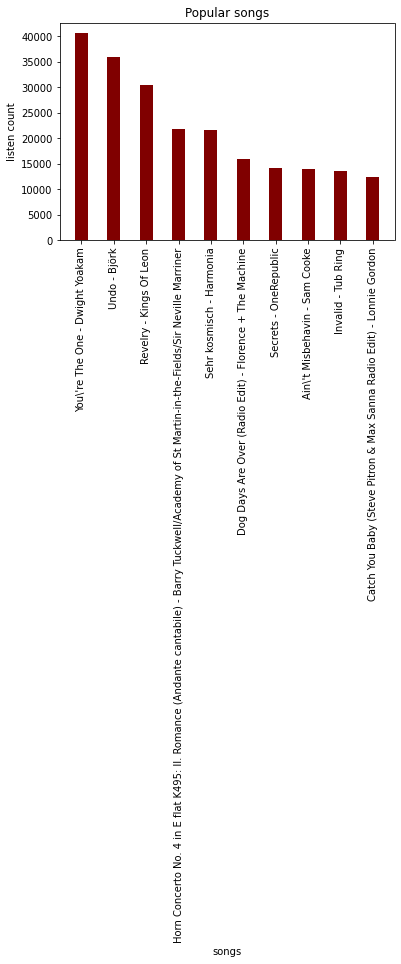

In [15]:
import numpy as np
d={}
for i,j in song_freq.head(10).iterrows():
    d[song_titles[i]]=j[0]

x=[]
y=[]
for i,j in d.items():
    x.append(i)
    y.append(j)

plt.bar(x,y, color ='maroon',
        width = 0.4)
 
plt.xlabel("songs")
plt.ylabel("listen count")
plt.title("Popular songs")
plt.xticks(rotation=90)
plt.show()

###  Sparse Matrix

In [10]:
from scipy.sparse import csr_matrix
  
def create_matrix(df):
      
    N = len(df['user_id'].unique())
    M = len(df['song_id'].unique())
      
    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["user_id"]), list(range(N))))
    song_mapper = dict(zip(np.unique(df["song_id"]), list(range(M))))
      
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["user_id"])))
    song_inv_mapper = dict(zip(list(range(M)), np.unique(df["song_id"])))
      
    user_index = [user_mapper[i] for i in df['user_id']]
    song_index = [song_mapper[i] for i in df['song_id']]
  
    X = csr_matrix((df["listen_count"], (song_index, user_index)), shape=(M, N))
    return X, user_mapper, song_mapper, user_inv_mapper, song_inv_mapper
  
X, user_mapper, song_mapper, user_inv_mapper, song_inv_mapper = create_matrix(data)

In [17]:
X


<10000x66346 sparse matrix of type '<class 'numpy.int64'>'
	with 1116609 stored elements in Compressed Sparse Row format>

### SVD

In [12]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
X = SVD.fit_transform(X)
X.shape

(10000, 12)

### K- Nearest Neighbors

In [1]:
from sklearn.neighbors import NearestNeighbors
def find_similar_songs(song_id, X, k, metric='cosine', show_distance=False):
    neighbour_ids = []
    song_ind = song_mapper[song_id]
    song_vec = X[song_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    song_vec = song_vec.reshape(1,-1)
    distances,neighbour = kNN.kneighbors(song_vec)#, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(song_inv_mapper[n])
    neighbour_ids.pop(0)
    distances=np.delete(distances,0)
    
    return neighbour_ids,distances

In [2]:
def result(id):
    song_id =id
    similar_ids,ngh = find_similar_songs(song_id, X, k=10)
    song_title = song_titles[song_id]
    l=[]
    print(f"Since you have listened to {song_title}\n")
    for i,j in enumerate(similar_ids):
        print(i+1,song_titles[j])
        l.append(song_titles[j])
        
    plt.bar(l,ngh)
    plt.xlabel("songs")
    plt.ylabel("distances")
    plt.title("recommended songs")
    plt.xticks(rotation=90)
    plt.show()

### Results

Since you have listened to The Cove - Jack Johnson

1 Breakfast At Tiffany\'s - Deep Blue Something
2 Disco Infiltrator (FK\'s Infiltrated Vocal) - LCD Soundsystem
3 Walk On Water - Basshunter
4 What I\'m Trying To Say Pt. 1 - Stars
5 Lasso - Phoenix
6 Annihilation By The Hands Of God (Album Version) - Roadrunner United
7 Black Man Ray - China Crisis
8 Strangers In The Wind - Cut Copy
9 Canada - Five Iron Frenzy
10 No Balanço Da Canoa - Alceu Valença


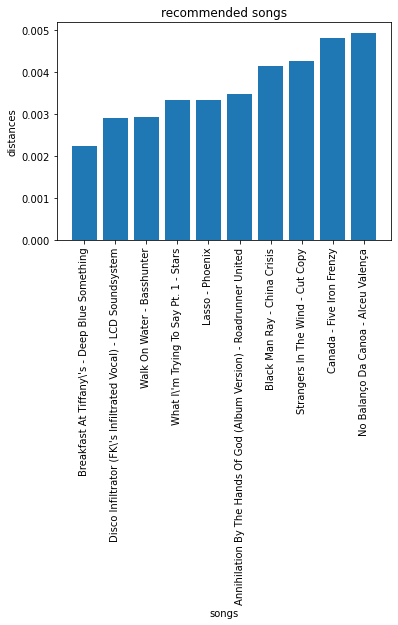

In [42]:
id='SOAKIMP12A8C130995'
result(id)

Since you have listened to Crack Under Pressure - Righteous Pigs

1 I\'m Goin\' Down - Bruce Springsteen
2 Pain In My Heart - Otis Redding
3 You Sang To Me - Marc Anthony
4 Hate On Me - Jill Scott
5 Charade - Skids
6 Everything\'s Ruined - Faith No More
7 Bad Trails - Battles
8 Radio Nowhere - Bruce Springsteen
9 Cupid - Jack Johnson
10 Just A Man - Faith No More


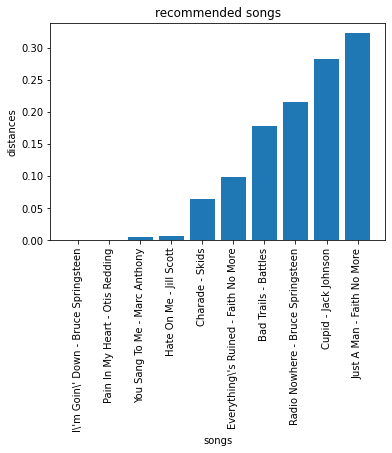

In [43]:
id='SOUAGPQ12A8AE47B3A'
result(id)

In [46]:
def resultTittle(tittle):
    song_tittle =tittle
    song_id=data[data['title']==song_tittle].iloc[0,1]
    
    similar_ids,ngh = find_similar_songs(song_id, X, k=10)
    song_title = song_titles[song_id]
    print(f"Since you have listened to {song_title}\n")
    l=[]
    for i,j in enumerate(similar_ids):
        print(i+1,song_titles[j])
        l.append(song_titles[j])
        
    plt.bar(l,ngh)
    plt.xlabel("songs")
    plt.ylabel("distances")
    plt.title("recommended songs")
    plt.xticks(rotation=90)
    plt.show()

Since you have listened to Crack Under Pressure - Righteous Pigs

1 I\'m Goin\' Down - Bruce Springsteen
2 Pain In My Heart - Otis Redding
3 You Sang To Me - Marc Anthony
4 Hate On Me - Jill Scott
5 Charade - Skids
6 Everything\'s Ruined - Faith No More
7 Bad Trails - Battles
8 Radio Nowhere - Bruce Springsteen
9 Cupid - Jack Johnson
10 Just A Man - Faith No More


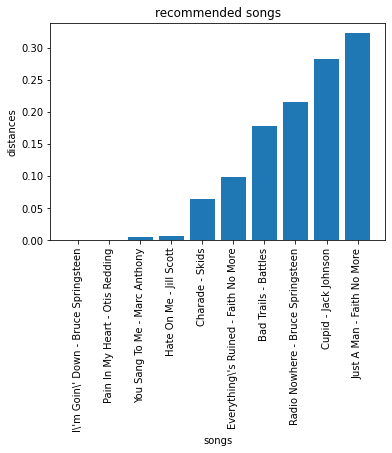

In [47]:
tittle='Crack Under Pressure'
resultTittle(tittle)

In [ ]:
X

In [ ]:
data[data['title']==tittle]['song'].iloc[0]